In [1]:
import pickle
import boris_extraction as boris
import multirecording_spikeanalysis as spike
import pandas as pd
import numpy as np
import os

In [2]:

def p2_create_array(boris_df, times, order, min_iti, min_bout, baseline = True):
    familiarization_df = boris_df[(boris_df['Start (s)'] < times[0])]
    baseline_df = boris_df[(boris_df['Start (s)'] > times[1]) & (boris_df['Start (s)'] < times[2])]
    if order[0] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[0] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[0] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[3]) & (boris_df['Start (s)'] < times[4])]
    if order[1] == 'familiar':
        recall_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[1] == 'cagemate':
        cagemate_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[1] == 'novel':
        novel_df = boris_df[(boris_df['Start (s)'] > times[5]) & (boris_df['Start (s)'] < times[6])]
    if order[2] == 'familiar':
        recall_df = boris_df[boris_df['Start (s)'] > times[7]]
    if order[2] == 'novel':
        novel_df = boris_df[boris_df['Start (s)'] > times[7]]
    if order[2] == 'cagemate':
        cagemate_df = boris_df[boris_df['Start (s)'] > times[7]]
    

    acquisition_array = boris.get_behavior_bouts(familiarization_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    recall_array = boris.get_behavior_bouts(recall_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    cagemate_array = boris.get_behavior_bouts(cagemate_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    novel_array = boris.get_behavior_bouts(novel_df, ['subject'], ['face sniffing', 'anogential sniffing'], min_iti, min_bout)
    if baseline:
        baseline_array = acquisition_array + 600000
        return [acquisition_array, recall_array, cagemate_array, novel_array, baseline_array]
    else:
        return [acquisition_array, recall_array, cagemate_array, novel_array]

def p2_make_assignment(recording, subject, event_arrays, baseline= True):
    if baseline:
        event_dict = {'acquisition': event_arrays[0], 'recall':event_arrays[1], 'cagemate':event_arrays[2], 'novel': event_arrays[3], 'baseline':event_arrays[4]}
    else:
        event_dict = {'acquisition': event_arrays[0], 'recall':event_arrays[1], 'cagemate':event_arrays[2], 'novel': event_arrays[3]}
    recording.event_dict = event_dict
    recording.subject = subject

def p2_camera_crash(boris_df1, boris_df2, times1, times2, order, media_duration, last_timestamp, min_iti, min_bout, baseline = True):
    array_1 = p2_create_array(boris_df1, times1, order, min_iti, min_bout, baseline)
    array_2 = p2_create_array(boris_df2, times2, order, min_iti, min_bout, baseline)
    diff = (last_timestamp / 20000 * 1000) - (media_duration)
    final_arrays = []
    for i in range(len(array_1)):
        array_2[i] = array_2[i] + diff
        new_array = np.concatenate([array_1[i], array_2[i]])
        final_arrays.append(new_array)
    return final_arrays
    
       
      
   

phase2_collection = spike.EphysRecordingCollection("D:\\social_ephys_pilot2_cum\\proc\\Phase 2")
with open('phase2_collection.pkl','wb') as file:
    pickle.dump(phase2_collection, file)

In [3]:
with open('phase2_collection.pkl', 'rb') as file:
    phase2_collection = pickle.load(file)
phase2_collection.collection.keys()

dict_keys(['20230803_101331_1_merged.rec', '20230803_121318_1_merged.rec', '20230803_141047_1_merged.rec', '20230804_121600_1_merged.rec', '20230804_141009_1_merged.rec', '20230817_100823_1_merged.rec', '20230817_113746_1_merged.rec', '20230818_115728_1_merged.rec', '20230818_133620_1_merged.rec'])

In [4]:
phase2_collection.collection.keys()
FCN_1_1 = phase2_collection.get_by_name('20230803_101331_1_merged.rec')
CNF_1_1 = phase2_collection.get_by_name('20230817_100823_1_merged.rec')
NFC_1_1 = phase2_collection.get_by_name('20230818_115728_1_merged.rec')

NFC_1_2 = phase2_collection.get_by_name('20230804_141009_1_merged.rec')
FCN_1_2 = phase2_collection.get_by_name('20230817_113746_1_merged.rec')
CNF_1_2 = phase2_collection.get_by_name('20230803_141047_1_merged.rec')
                                        
FCN_1_4 = phase2_collection.get_by_name('20230804_121600_1_merged.rec')
NFC_1_4 = phase2_collection.get_by_name('20230803_121318_1_merged.rec')
CNF_1_4 = phase2_collection.get_by_name('20230818_133620_1_merged.rec')


In [5]:
#ONE VIDEO
#20230817_100823_1.1_CNF
CNF_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_100823_1_merged.rec\\20230817_100823_1.1_CNF.xlsx")
times_CNF_1_1 = [630, 633, 1226, 1228, 1526, 1531, 1828, 1832]
order_CNF_1_1 = ['cagemate', 'novel', 'familiar']

CNF_1_1_arrays = p2_create_array(CNF_1_1_boris_df, times_CNF_1_1, order_CNF_1_1, 2, 0.5)
p2_make_assignment(CNF_1_1, '1.1', CNF_1_1_arrays)

#TWO VIDEOS
#20230803_101331_1_FCN_1
FCN_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.1.xlsx")
FCN_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\Phase 2\\20230803_101331_1_merged.rec\\20230803 101331 1.2.xlsx")
times_FCN_1_1_1 = [599, 603, 821, 0, 0, 0, 0, 99999999999]
times_FCN_1_1_2 = [0, 0, 374, 377, 671, 677, 970, 976]
order_FCN_1_1 = ['familiar', 'cagemate', 'novel']
FCN_1_1_media_duration = 1290.567 * 1000
FCN_1_1_last_timestamp = FCN_1_1.timestamps_var[-1]

FCN_1_1_arrays = p2_camera_crash(FCN_1_1_1_boris_df, FCN_1_1_2_boris_df, times_FCN_1_1_1, times_FCN_1_1_2, order_FCN_1_1, FCN_1_1_media_duration, FCN_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(FCN_1_1, '1.1', FCN_1_1_arrays)

#20230818_115728_1.1_NFC
NFC_1_1_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.1.xlsx")
NFC_1_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_115728_1_merged.rec\\20230818 115728 1.2.xlsx")
times_NFC_1_1_1 = [111, 0, 0, 0, 0, 0, 0, 0, 99999999999]
times_NFC_1_1_2 = [527, 533, 1147, 1151, 1446, 1454, 1754, 1762]
order_NFC_1_1 = ['novel', 'familiar', 'cagemate']
NFC_1_1_media_duration = 2059.6 * 1000
NFC_1_1_last_timestamp = NFC_1_1.timestamps_var[-1]

NFC_1_1_arrays = p2_camera_crash(NFC_1_1_1_boris_df, NFC_1_1_2_boris_df, times_NFC_1_1_1, times_NFC_1_1_2, order_NFC_1_1, NFC_1_1_media_duration, NFC_1_1_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_1, '1.1', NFC_1_1_arrays)


#20230704_141009_1.2_NFC8
NFC_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_141009_1_merged.rec\\20230804_141009_1.2_2t2bL_NFC.xlsx")
times_NFC_1_2 = [600, 606, 1199, 1202, 1500, 1508, 1800, 1806]
order_NFC_1_2 = ['novel', 'familiar', 'cagemate']

NFC_1_2_arrays = p2_create_array(NFC_1_2_boris_df, times_NFC_1_2, order_NFC_1_2, 2, 0.5)
p2_make_assignment(NFC_1_2, '1.2', NFC_1_2_arrays)


#20230817_113746_1.2_FCN
FCN_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230817_113746_1_merged.rec\\20230817_113746_1.2_2t2bL_FCN.xlsx")
times_FCN_1_2 = [599, 604, 1200, 1203, 1499, 1506, 1811, 1817]
order_FCN_1_2 = ['familiar', 'cagemate', 'novel']

FCN_1_2_arrays = p2_create_array(FCN_1_2_boris_df, times_FCN_1_2, order_FCN_1_2, 2, 0.5)
p2_make_assignment(FCN_1_2, '1.2', FCN_1_2_arrays)

#20230803_141047_1.2_CNF
CNF_1_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_141047_1_merged.rec\\20230803 _ 141047 _1.2 2t2bL CNF .xlsx")
times_CNF_1_2 = [600, 605, 1200, 1203, 1500, 1506, 1800, 1806]
order_CNF_1_2 = ['cagemate', 'novel', 'familiar']

CNF_1_2_arrays = p2_create_array(CNF_1_2_boris_df, times_CNF_1_2, order_CNF_1_2, 2, 0.5)
p2_make_assignment(CNF_1_2, '1.2', CNF_1_2_arrays)

#20230804_121600_1.4_FCN
FCN_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230804_121600_1_merged.rec\\20230804_121600_1.4_3t3bL_FCN.xlsx")
times_FCN_1_4 = [600, 607, 1203, 1206, 1499, 1505, 1799, 1807]
order_FCN_1_4 = ['familiar', 'cagemate', 'novel']

FCN_1_4_arrays = p2_create_array(FCN_1_4_boris_df, times_FCN_1_4, order_FCN_1_4, 2, 0.5)
p2_make_assignment(FCN_1_4, '1.4', FCN_1_4_arrays)

#20230818_133620_1.4_CNF
CNF_1_4_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230818_133620_1_merged.rec\\20230818_133620_1.4_3t3bL_CNF.xlsx")
times_CNF_1_4 = [599, 605, 1158, 1202, 1497, 1503, 1800, 1806]
order_CNF_1_4 = ['cagemate', 'familiar', 'novel']

CNF_1_4_arrays = p2_create_array(CNF_1_4_boris_df, times_CNF_1_4, order_CNF_1_4, 2, 0.5)
p2_make_assignment(CNF_1_4, '1.4', CNF_1_4_arrays)


#20230803_121318_1.4_NFC
NFC_1_4_1_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.1.xlsx")
NFC_1_4_2_boris_df = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\20230803_121318_1_merged.rec\\20230803 121318 1.2.xlsx")
times_NFC_1_4_1 = [599, 604, 1021, 0, 0, 0, 0, 99999999]
times_NFC_1_4_2 =  [0, 0, 50, 53, 347, 354, 650, 656]
order_NFC_1_4 = ['novel', 'familiar', 'cagemate']
NFC_1_4_media_duration = 951.633 * 1000
NFC_1_4_last_timestamp = NFC_1_4.timestamps_var[-1]

NFC_1_4_arrays = p2_camera_crash(NFC_1_4_1_boris_df, NFC_1_4_2_boris_df, times_NFC_1_4_1, times_NFC_1_4_2, order_NFC_1_4, NFC_1_4_media_duration, NFC_1_4_last_timestamp, 2, 0.5)
p2_make_assignment(NFC_1_4, '1.4', NFC_1_4_arrays)




In [6]:
phase2_analysis = spike.SpikeAnalysis_MultiRecording(phase2_collection, 100, 50, 0.5)


All set to analyze


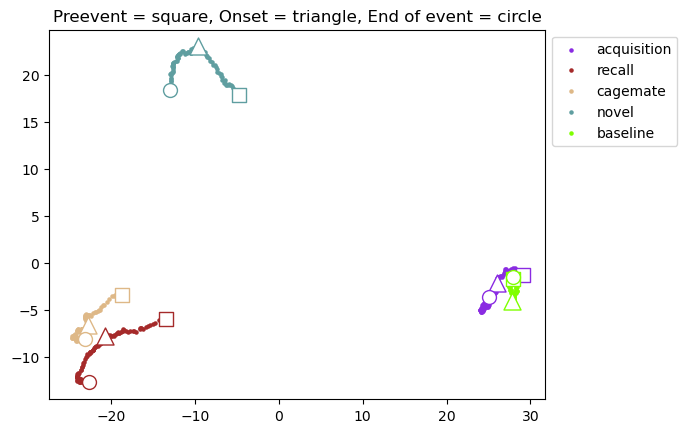

(                   0         1         2         3         4         5    \
 acquisition  29.058440 -1.265879 -1.754991  5.799608  5.092883  0.812728   
 acquisition  28.934241 -1.409571 -1.821224  5.864635  5.062912  0.850635   
 acquisition  28.948091 -1.359929 -1.818310  5.934578  5.043929  0.926435   
 acquisition  28.890241 -1.263428 -1.848902  6.072781  5.025409  0.948718   
 acquisition  28.776820 -1.301791 -1.852969  6.272908  5.030579  1.051922   
 ...                ...       ...       ...       ...       ...       ...   
 baseline     27.966695 -1.357532  3.203345 -6.638040 -4.284467  0.621885   
 baseline     27.892260 -1.289677  3.204245 -6.624517 -4.263486  0.521853   
 baseline     27.860242 -1.327453  3.193116 -6.731134 -4.275889  0.594939   
 baseline     27.922643 -1.290001  3.194529 -6.896341 -4.229743  0.614236   
 baseline     27.882566 -1.431153  3.193796 -6.799056 -4.221425  0.454798   
 
                   6         7         8         9    ...       205       

In [7]:
phase2_analysis.PCA_trajectories(3, 2)

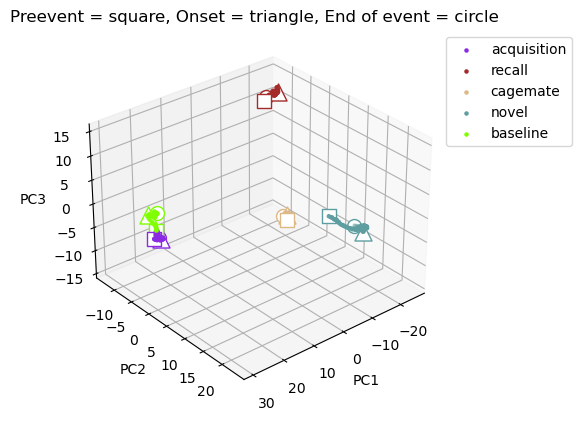

(                   0         1         2         3         4         5    \
 acquisition  29.058440 -1.265879 -1.754991  5.799608  5.092883  0.812728   
 acquisition  28.934241 -1.409571 -1.821224  5.864635  5.062912  0.850635   
 acquisition  28.948091 -1.359929 -1.818310  5.934578  5.043929  0.926435   
 acquisition  28.890241 -1.263428 -1.848902  6.072781  5.025409  0.948718   
 acquisition  28.776820 -1.301791 -1.852969  6.272908  5.030579  1.051922   
 ...                ...       ...       ...       ...       ...       ...   
 baseline     27.966695 -1.357532  3.203345 -6.638040 -4.284467  0.621885   
 baseline     27.892260 -1.289677  3.204245 -6.624517 -4.263486  0.521853   
 baseline     27.860242 -1.327453  3.193116 -6.731134 -4.275889  0.594939   
 baseline     27.922643 -1.290001  3.194529 -6.896341 -4.229743  0.614236   
 baseline     27.882566 -1.431153  3.193796 -6.799056 -4.221425  0.454798   
 
                   6         7         8         9    ...       205       

In [8]:
phase2_analysis.PCA_trajectories(3, 2, d = 3, azim=10, elev=80)

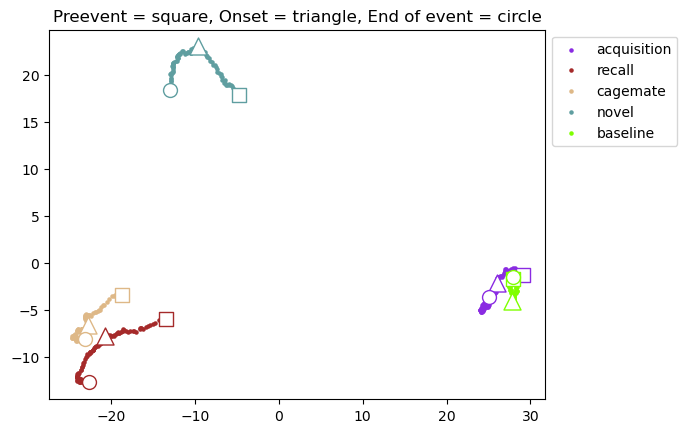

(                   0         1         2         3         4         5    \
 acquisition  29.058440 -1.265879 -1.754991  5.799608  5.092883  0.812728   
 acquisition  28.934241 -1.409571 -1.821224  5.864635  5.062912  0.850635   
 acquisition  28.948091 -1.359929 -1.818310  5.934578  5.043929  0.926435   
 acquisition  28.890241 -1.263428 -1.848902  6.072781  5.025409  0.948718   
 acquisition  28.776820 -1.301791 -1.852969  6.272908  5.030579  1.051922   
 ...                ...       ...       ...       ...       ...       ...   
 baseline     27.966695 -1.357532  3.203345 -6.638040 -4.284467  0.621885   
 baseline     27.892260 -1.289677  3.204245 -6.624517 -4.263486  0.521853   
 baseline     27.860242 -1.327453  3.193116 -6.731134 -4.275889  0.594939   
 baseline     27.922643 -1.290001  3.194529 -6.896341 -4.229743  0.614236   
 baseline     27.882566 -1.431153  3.193796 -6.799056 -4.221425  0.454798   
 
                   6         7         8         9    ...       205       

In [9]:
phase2_analysis.PCA_trajectories(3, 2)

In [10]:
for event in ['acquisition', 'recall', 'novel', 'cagemate']:    
    phase2_analysis.wilcox_event_v_event_collection(event, 'baseline', 3, 2, plot = False, save = True)



In [11]:
phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.47815533980582525, 0.11028141565127274, [[9, 206], [18, 197]])

In [12]:
phase2_analysis.fishers_exact_wilcox('novel', 'cagemate', 3, 2, save = True)


c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.3341103341103342, 0.5707871618016132, [[17, 198], [13, 202]])

In [13]:
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(2.080402010050251, 0.1400273498715525, [[16, 199], [8, 207]])

In [14]:
phase2_analysis.fishers_exact_wilcox('recall', 'acquisition', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.6398809523809523, 0.2630342664289562, [[19, 196], [12, 203]])

In [15]:
phase2_analysis.fishers_exact_wilcox('novel', 'acquisition', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.4524410774410774, 0.44232063702972463, [[17, 198], [12, 203]])

In [16]:
phase2_analysis.fishers_exact_wilcox('novel', 'acquisition', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.1304611650485437, 1.0, [[9, 206], [8, 207]])

In [17]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 2, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.5062794348508635, 0.35845659874431657, [[19, 196], [13, 202]])

In [18]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 5, 2, save = True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(0.8799553322166388, 0.8584621230414382, [[16, 199], [18, 197]])

In [19]:
phase2_analysis.fishers_exact_wilcox('recall', 'cagemate', 3, 2, save= True)

c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")
c:\Users\megha\anaconda3\envs\ephys_analysis\lib\site-packages\scipy\stats\_morestats.py:3428: UserWarning: 

(1.593688362919132, 0.2768895587963544, [[20, 195], [13, 202]])

In [20]:
for recording in phase2_collection.collection.values():
    print(recording.event_dict['baseline']/1000/60)

[[1.25278333 1.2811    ]
 [1.28111667 1.41221667]
 [1.45721667 1.56388333]
 [2.16111667 2.17278333]
 [2.40166667 2.42333333]
 [2.96778333 3.03945   ]
 [3.74221667 3.75611667]]
[[1.265      1.28221667]
 [1.31555    1.32388333]
 [1.48611667 1.55666667]
 [1.63445    1.72666667]
 [1.75555    1.76388333]
 [1.84555    1.86778333]
 [2.23333333 2.24388333]
 [3.56666667 3.58166667]
 [3.61278333 3.62445   ]
 [6.11666667 6.2       ]
 [6.35778333 6.37611667]
 [6.53721667 6.56778333]
 [9.33111667 9.34221667]]
[[ 1.12753333  1.1734    ]
 [ 1.17341667  1.27278333]
 [ 1.305       1.32778333]
 [ 1.50111667  1.52055   ]
 [ 1.575       1.74778333]
 [ 2.34        2.36666667]
 [ 2.41666667  2.46221667]
 [ 2.56555     2.80445   ]
 [ 2.91611667  2.96111667]
 [ 3.02888333  3.11778333]
 [ 3.25945     3.27221667]
 [ 3.445       3.51333333]
 [ 3.98221667  4.02833333]
 [ 4.05278333  4.10833333]
 [ 4.18778333  4.365     ]
 [ 4.51721667  4.57166667]
 [ 4.67221667  4.735     ]
 [ 5.48333333  5.49943333]
 [ 5.49945  

In [21]:
event_info = {}
for recording_name, recording in phase2_collection.collection.items():
    for event, events in recording.event_dict.items():
        no_events = events.shape[0]
        sniff_length = 0
        for sniff in events:
            sniff_length_temp = sniff[1] - sniff[0]
            sniff_length = sniff_length +sniff_length_temp
        total_sniff_time = sniff_length/1000
        avg_event = sniff_length/no_events/1000
        if (recording_name + recording.subject) in event_info.keys():
            dict_event = event_info[recording_name + recording.subject]
            dict_event[event] =  {'no_events': no_events, 'avg event': avg_event, 'total time': total_sniff_time}
            event_info[recording_name + recording.subject] =  dict_event
        else:
            event_info[recording_name + recording.subject] = {event: {'no_events': no_events, 'avg event': avg_event,'total time': total_sniff_time }}


In [22]:
event_overview = pd.concat({k: pd.DataFrame(v) for k, v in event_info.items()}, axis=0)
event_overview = event_overview.reset_index()
event_overview['order'] = ['FCN', 'FCN', 'FCN', 'NFC', 'NFC', 'NFC', 'CNF', 'CNF','CNF', 
                           'FCN', 'FCN', 'FCN', 'NFC', 'NFC','NFC', 'CNF', 'CNF', 'CNF',
                            'FCN','FCN', 'FCN', 'NFC', 'NFC','NFC', 'CNF', 'CNF', 'CNF' ]


In [23]:
no_events = event_overview[event_overview['level_1'] == 'no_events']
no_events

FCN_df = event_overview[event_overview['order'] == 'FCN']
CNF_df = event_overview[event_overview['order'] == 'CNF']
NFC_df = event_overview[event_overview['order'] == 'NFC']

In [24]:
event_total_time = event_overview[event_overview['level_1'] == 'total time']
event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = event_total_time[event].mean()
    event_total_time_averages[event] = avg_event
event_total_time_averages

{'acquisition': 66.58255555555553,
 'recall': 29.52844444444442,
 'novel': 32.606,
 'cagemate': 27.24144444444447}

Text(0, 0.5, 'Total sniff (s)')

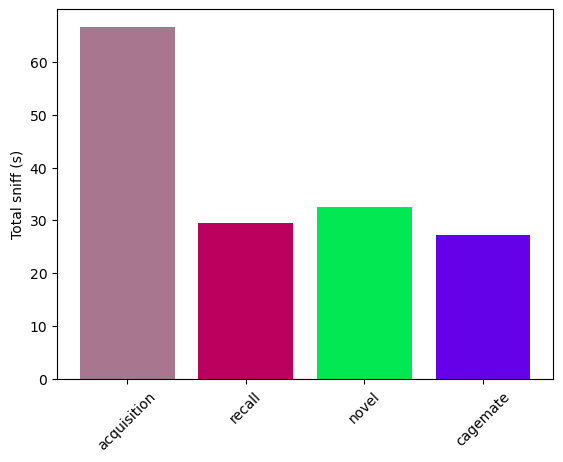

In [25]:
import matplotlib.pyplot as plt
colors = ['#A8778f', '#Bb005d','#01e852','#6401e8']
plt.bar(event_total_time_averages.keys(), event_total_time_averages.values(), color = colors)
plt.xticks(rotation=45)
plt.ylabel('Total sniff (s)')


In [26]:
FCN_event_total_time = FCN_df[FCN_df['level_1'] == 'total time']
FCN_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = FCN_event_total_time[event].mean()
    FCN_event_total_time_averages[event] = avg_event
FCN_event_total_time_averages

{'acquisition': 32.82133333333328,
 'recall': 19.777333333333335,
 'novel': 26.122,
 'cagemate': 20.497333333333334}

In [27]:
NFC_event_total_time = NFC_df[NFC_df['level_1'] == 'total time']
NFC_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = NFC_event_total_time[event].mean()
    NFC_event_total_time_averages[event] = avg_event
NFC_event_total_time_averages

{'acquisition': 39.108,
 'recall': 17.57766666666667,
 'novel': 23.921000000000003,
 'cagemate': 17.84200000000008}

In [28]:
CNF_event_total_time = CNF_df[CNF_df['level_1'] == 'total time']
CNF_event_total_time_averages = {}
for event in ['acquisition', 'recall', 'novel', 'cagemate']:
    avg_event = CNF_event_total_time[event].mean()
    CNF_event_total_time_averages[event] = avg_event
CNF_event_total_time_averages

{'acquisition': 127.81833333333331,
 'recall': 51.230333333333256,
 'novel': 47.775000000000006,
 'cagemate': 43.385}

In [29]:
CNF_df

,level_0,level_1,acquisition,recall,cagemate,novel,baseline,order
6,20230803_141047_1_merged.rec1.2,no_events,38.000000,14.000000,15.000000,10.000000,38.000000,CNF
7,20230803_141047_1_merged.rec1.2,avg event,3.240684,2.942643,3.728400,2.743500,3.240684,CNF
8,20230803_141047_1_merged.rec1.2,total time,123.146000,41.197000,55.926000,27.435000,123.146000,CNF
15,20230817_100823_1_merged.rec1.1,no_events,66.000000,23.000000,23.000000,28.000000,66.000000,CNF
16,20230817_100823_1_merged.rec1.1,avg event,3.468879,3.727174,2.247652,3.898429,3.468879,CNF
17,20230817_100823_1_merged.rec1.1,total time,228.946000,85.725000,51.696000,109.156000,228.946000,CNF
24,20230818_133620_1_merged.rec1.4,no_events,16.000000,12.000000,13.000000,6.000000,16.000000,CNF
25,20230818_133620_1_merged.rec1.4,avg event,1.960187,2.230750,1.733308,1.122333,1.960187,CNF
26,20230818_133620_1_merged.rec1.4,total time,31.363000,26.769000,22.533000,6.734000,31.363000,CNF


In [30]:
phase2_analysis.export()

No PCA matrices have been saved
No z-scored events saved.


c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1387: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Event_x', 'Wilcoxon Stat_x', 'event1 vs event2_x', 'p value_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_wilcox = current_wilcox.merge(temp_df,
c:\Users\megha\Documents\GitHub\diff_fam_social_memory_ephys\multirecording_spikeanalysis.py:1387: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Event_x', 'Wilcoxon Stat_x', 'event1 vs event2_x', 'p value_x'} in the result is deprecated and will raise a MergeError in a future version.
  new_wilcox = current_wilcox.merge(temp_df,


In [31]:
phase2_analysis.wilcox_event_v_event_collection('recall', 'cagemate', 3, 2, plot = False, save =True )
phase2_analysis.wilcox_event_v_event_collection('novel', 'recall', 3, 2, plot = False, save = True)
phase2_analysis.wilcox_event_v_event_collection('novel', 'cagemate', 3, 2, plot = False, save = True)

In [32]:
phase2_analysis.wilcox_event_v_event_collection('acquisition', 'novel', 3, 2, plot = False, save =True)
phase2_analysis.wilcox_event_v_event_collection('acquisition', 'recall', 3, 2, plot = False, save =True)

In [33]:
phase2_analysis.export()

No PCA matrices have been saved
No z-scored events saved.


In [34]:
wilcoxon_results = pd.read_excel("D:\\social_ephys_pilot2_cum\\proc\\Phase 2\\100sw_50msbin_wilcoxon.xlsx")


In [35]:
wilcoxon_results = wilcoxon_results[['original unit id',
 'Event_x',
 'event1 vs event2_x',
 'Event_y',
 'event1 vs event2_y',
 'Event_x.1',
 'event1 vs event2_x.1',
 'Event_y.1',
 'event1 vs event2_y.1',
 'Event',
 'event1 vs event2']]
wilcoxon_results.columns = ['original unit id',
 'Event_x',
 'acquisition vs novel',
 'Event_y',
 'acquisition vs recall',
 'Event_x.1',
 'recall vs cagemate',
 'Event_y.1',
 'novel vs recall',
 'Event',
 'novel vs cagemate']
wilcoxon_results = wilcoxon_results[['original unit id',
 'acquisition vs novel',
 'acquisition vs recall',
 'recall vs cagemate',
 'novel vs recall',
 'novel vs cagemate']]

In [36]:


def get_fam_score(acquisition_vs_novel, recall_vs_cagemate, novel_vs_recall, novel_vs_cagemate, acquisition_vs_recall, id_score):
    fam_score = 0
    if acquisition_vs_novel == 'not significant':
        if recall_vs_cagemate != 'not significant':
            fam_score +=1
        if novel_vs_recall != 'not significant':
            fam_score +=1
        if novel_vs_cagemate != 'not significant':
            fam_score +=2
        if (id_score != 0):
            if id_score == 'familiarity?':
                fam_score = fam_score
            else:
                fam_score += (-2)
        if acquisition_vs_recall != 'not significant':
            fam_score += 1
    return fam_score

def get_id_score(acquisition_vs_novel, recall_vs_cagemate, novel_vs_recall, novel_vs_cagemate, acquisition_vs_recall):
    id_score = 0
    if acquisition_vs_recall == 'not significant':
        if (recall_vs_cagemate != 'not significant') & (novel_vs_cagemate != 'not significant'):
                id_score = 'cagemate'
        if (novel_vs_recall != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'familiar'
        if (novel_vs_recall != 'not significant') & (novel_vs_cagemate != 'not significant'):
                id_score = 'novel'
        if (novel_vs_recall != 'not significant') & (novel_vs_cagemate != 'not significant') & (recall_vs_cagemate != 'not significant'):
             id_score = 'familiarity?'
    if acquisition_vs_recall != 'not significant':
         if (novel_vs_recall != 'not significant') & (recall_vs_cagemate != 'not significant'):
                id_score = 'recall'
    return id_score



In [37]:
wilcoxon_results['id score'] = wilcoxon_results.apply(lambda row: get_id_score(row['acquisition vs novel'], row['recall vs cagemate'], row['novel vs recall'], row['novel vs cagemate'], row['acquisition vs recall']), axis = 1) 

wilcoxon_results['fam score'] = wilcoxon_results.apply(lambda row: get_fam_score(row['acquisition vs novel'], row['recall vs cagemate'], row['novel vs recall'], row['novel vs cagemate'], row['acquisition vs recall'], row['id score']), axis = 1) 


In [38]:
ID_score = wilcoxon_results[(wilcoxon_results['id score'] != 0) & (wilcoxon_results['id score'] != 'familiarity?')
                            &  (wilcoxon_results['id score'] != 'recall')]
ID_score
cagemate_df = ID_score[ID_score['id score'] == 'cagemate']   
len(cagemate_df)

3

In [39]:
fam_df = wilcoxon_results[(wilcoxon_results['fam score'] > 1)]
len(fam_df)

33

In [40]:
len(ID_score)

11

In [41]:
phase2_collection.wilcox_dfs
df_list = []
for comparison in ['novel vs baseline (3s)', 'cagemate vs baseline (3s)', 'recall vs baseline (3s)', 'acquisition vs baseline (3s)']:
    df = phase2_collection.wilcox_dfs[comparison]
    df_list.append(df)

is_first = True 
for df in df_list:
    if is_first:
        master_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event','event1 vs event2']]
        is_first = False
    else: 
        temp_df = df[['Subject', 'Recording', 'original unit id', 
                            'Event', 'event1 vs event2']]
        master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')
    
master_df 

C:\Users\megha\AppData\Local\Temp\ipykernel_29348\3313645281.py:16: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Event_x', 'event1 vs event2_x'} in the result is deprecated and will raise a MergeError in a future version.
  master_df = master_df.merge(temp_df,  on=['Subject', 'Recording', 'original unit id'], how = 'left')


,Subject,Recording,original unit id,Event_x,event1 vs event2_x,Event_y,event1 vs event2_y,Event_x,event1 vs event2_x,Event_y,event1 vs event2_y
0,1.1,20230803_101331_1_merged.rec,196,novel vs baseline (3s),decreases,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant
1,1.1,20230803_101331_1_merged.rec,91,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant
2,1.1,20230803_101331_1_merged.rec,267,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),increases
3,1.1,20230803_101331_1_merged.rec,136,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant
4,1.1,20230803_101331_1_merged.rec,79,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant
...,...,...,...,...,...,...,...,...,...,...,...
210,1.4,20230818_133620_1_merged.rec,101,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant
211,1.4,20230818_133620_1_merged.rec,50,novel vs baseline (3s),increases,cagemate vs baseline (3s),increases,recall vs baseline (3s),increases,acquisition vs baseline (3s),not significant
212,1.4,20230818_133620_1_merged.rec,74,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),decreases,acquisition vs baseline (3s),not significant
213,1.4,20230818_133620_1_merged.rec,107,novel vs baseline (3s),not significant,cagemate vs baseline (3s),not significant,recall vs baseline (3s),not significant,acquisition vs baseline (3s),not significant


In [42]:
master_df.columns = ['Subject',
 'Recording',
 'original unit id',
 'Event_x',
 'novel vs baseline (3s)',
 'Event_y',
 'cagemate vs baseline (3s)',
 'Event_x',
 'familiar vs baseline (3s)',
 'Event_y',
 'acquisition vs baseline (3s)']
master_df = master_df[['original unit id',
 'novel vs baseline (3s)',
 'cagemate vs baseline (3s)',
 'familiar vs baseline (3s)',
 'acquisition vs baseline (3s)']]
master_df

,original unit id,novel vs baseline (3s),cagemate vs baseline (3s),familiar vs baseline (3s),acquisition vs baseline (3s)
0,196,decreases,not significant,not significant,not significant
1,91,not significant,not significant,not significant,not significant
2,267,not significant,not significant,not significant,increases
3,136,not significant,not significant,not significant,not significant
4,79,not significant,not significant,not significant,not significant
...,...,...,...,...,...
210,101,not significant,not significant,not significant,not significant
211,50,increases,increases,increases,not significant
212,74,not significant,not significant,decreases,not significant
213,107,not significant,not significant,not significant,not significant


In [43]:
def group_cells(novel, cagemate, fam, acquisition):
    group = ''
    if novel != 'not significant':
        group = 'novel'
    if cagemate != 'not significant':
        group = group + 'cagemate' 
    if fam != 'not significant':
        group = group + 'fam'
    if acquisition != 'not significant':
        group = group + 'acquisition'
    return group

master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline (3s)'],
                                                                  row['cagemate vs baseline (3s)'],
                                                                  row['familiar vs baseline (3s)'],
                                                                  row['acquisition vs baseline (3s)']), axis = 1)
results = master_df.groupby('cell group').count()
results

C:\Users\megha\AppData\Local\Temp\ipykernel_29348\1631250975.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  master_df['cell group'] = master_df.apply(lambda row: group_cells(row['novel vs baseline (3s)'],


,original unit id,novel vs baseline (3s),cagemate vs baseline (3s),familiar vs baseline (3s),acquisition vs baseline (3s)
cell group,,,,,
,67,67,67,67,67
acquisition,6,6,6,6,6
cagemate,18,18,18,18,18
cagemateacquisition,6,6,6,6,6
cagematefam,13,13,13,13,13
cagematefamacquisition,3,3,3,3,3
fam,15,15,15,15,15
famacquisition,3,3,3,3,3
novel,7,7,7,7,7


In [44]:
master_df[master_df['cell group'] == 'novelcagemate']


,original unit id,novel vs baseline (3s),cagemate vs baseline (3s),familiar vs baseline (3s),acquisition vs baseline (3s),cell group
9,141,decreases,decreases,not significant,not significant,novelcagemate
12,173,increases,increases,not significant,not significant,novelcagemate
45,35,decreases,decreases,not significant,not significant,novelcagemate
58,183,increases,increases,not significant,not significant,novelcagemate
70,34,decreases,decreases,not significant,not significant,novelcagemate
97,33,increases,decreases,not significant,not significant,novelcagemate
104,126,increases,decreases,not significant,not significant,novelcagemate
107,28,decreases,decreases,not significant,not significant,novelcagemate
136,20,increases,increases,not significant,not significant,novelcagemate
142,41,decreases,decreases,not significant,not significant,novelcagemate


In [45]:
# Define the sets (you can replace these with your own data)
overlap_counts = (39, 35, 7, 27, 8, 6, 16)

# Create the Venn diagram
venn3(subsets=overlap_counts, set_labels=('Cagemate', 'Familiar', 'Novel'))

# Add labels
# plt.text(0.35, 0.7, 'A', fontsize=12, va='center')
# plt.text(0.7, 0.7, 'B', fontsize=12, va='center')
# plt.text(0.5, 0.3, 'C', fontsize=12, va='center')
# plt.text(0.85, 0.3, 'E', fontsize=12, va='center')
# plt.text(0.57, 0.45, 'D', fontsize=12, va='center')
# plt.text(0.65, 0.15, 'F', fontsize=12, va='center')
# plt.text(0.75, 0.6, 'G', fontsize=12, va='center')
# plt.text(0.45, 0.15, 'H', fontsize=12, va='center')

# Display the Venn diagram
plt.title('Three-Set Venn Diagram')
plt.show()

NameError: name 'venn3' is not defined